## Sprint 2: Data

Name: Praggnya Kanungo

Class: DS 4003

Due Date: 3/13/24

**--My Beginning of My Assignment--**

The dataset I've chosen is the Gapminder Dataset for CO2 emissions per capita Consumption based, tonnes per capita. 

##### **Downloadiing and Importing My Dataset**

In [97]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [98]:
#Praggnya Kanungo
#DS 4003 
# This is my code for Sprint#2

import pandas as pd  
# This is the line that imports the pandas library which basically how I will do all of my data activities

# This like is a something that reads the CO2 emissions per capita from a CSV file into a pandas df
df = pd.read_csv(r"C:\Users\pragg\Downloads\co2_pcap_cons.csv")

#### **Purpose of Choosing this Data and Provenance**

**Why did I choose this data?:** Personally, the Climate Change has been one of my influencing factors in my urge to be an engineer since I hope to be able to conducts studies on climate change and innovate more sustainable tehcnology that can aid in the human attempts to recover from climate change. Clearly, one of the direct causing factors of climate change and the warming of the Earth are the increasing CO2 Emissions around the world. I looked through multiple sources and spent a significant amount of time looking for an appropriate dataset with CO2 Emissions, with minimal amounts of missing data because I proritized accuracy. My chosen dataset shows CO2 emissions per capita, which are relevant for studies on environmental impact, climate change, and energy policy. I hope to create impact on the user's mind and make them aware of the increasing CO2 emissions, and this is why I used the dataset. While of course there were other datasets with CO2 Emissions data as well, but I realized that many of these datasets had missing values for certain countries or had inconsistly missing values for certain years. I wanted to make sure the dataset I choose already has most, if not all, of its intended values so I can make sure that my dashboard is accurate. Other datasets often only had CO2 emission data for different countries up untilmany years ago, thus they didn't include recent data. The dataset I've chosen was definitely the most appropriate one I found since it includes recent data while also not missing any data. It is a beautiful dataset!

**Data Provenance:** The source of this data is from gapminder.com. The source URL is the following: http://gapm.io/dco2_consumption_historic. The data provenance comes from the World Bank. This is one of the many datasets the World Bank offers about countries in order to research and analyze patterns and data related relatioships; its collects this data from the system of countries that agree to be members of this cause. The purpose of collecting CO2 emission per capita data is that helps researchers understand possible implications of the CO2 emissions per capita, and can also encourage further study and analysis on CO2 emission data. Another purpose of collecting this data is to note significant changes in CO2 emissions per capita which could also be success criteria for evaluating the sucess of government levied policies in certain countries.

#### **In the below code boxes, I have done the data cleaning in parts.** 

First, I'll try to understand my dataset by running the following code and this will help me decide my next steps in cleaning the data:

In [99]:
# This displays the first few rows of the dataset
print(df.head())

# This gets me a concise summary of the DataFrame
print(df.info())

# This will basically summarize statistics for numerical columns
print(df.describe())

# Here I am just checking the data types
print(df.dtypes)


       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...  2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...  0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...  1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...  2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.9   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...    27  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700   

     2022  
0   0.284  
1   1.23

In every dataset, it is definitely very important to check for missing values. In the context of my dataset and future dashboard, having missing values that aren't handled properly will be disasterous, perhaps causing missinformation or inaccuracy in the visualizations. In the following code I am checking for missing values:

In [100]:
# Here i am checking for missing values 
print(df.isnull().sum())

# after running this, I now know I dont have missing values

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2018       0
2019       0
2020       0
2021       0
2022       0
Length: 224, dtype: int64


In [101]:
# here I am reshaping the data from wide to long format
# I need to do this to first of all more easily use my data for my dashboard later but also to make sure this data set is as clean and tidy as possible
df_long = pd.melt(df, id_vars=['country'], var_name='year', value_name='co2_per_capita')

#just looking at the first five rows to see if I was sucessful
df_long.head()

,country,year,co2_per_capita
0,Afghanistan,1800,0.001
1,Angola,1800,0.009
2,Albania,1800,0.001
3,Andorra,1800,0.333
4,UAE,1800,0.063


In [102]:
# Here I am converting 'year' to numeric, and I tell it to coerce errors to NaN
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')

# here I am converting 'co2_per_capita' to numeric, and I tell it to coerce errors to NaN
df_long['co2_per_capita'] = pd.to_numeric(df_long['co2_per_capita'], errors='coerce')

# Now, I can handles NaNs if I need to by dropping them since I will not be replaning NaN with values I adjust (like simply replacing with the median) 
# since I want my data and dashboard to be as accruate as possible. Therefore, if these is NaN values, I will unfornately have to drop it
df_long = df_long.dropna(subset=['year', 'co2_per_capita'])

df_cleaned = df_long[['country', 'year', 'co2_per_capita']].copy()


In [103]:
# Here I am converting 'country' to categorical variables
df_cleaned['country'] = df_cleaned['country'].astype('category')

df_cleaned.head()

,country,year,co2_per_capita
0,Afghanistan,1800,0.001
1,Angola,1800,0.009
2,Albania,1800,0.001
3,Andorra,1800,0.333
4,UAE,1800,0.063


In [104]:
# If you want to set 'country' as index for df_cleaned
#df_cleaned.set_index('country', inplace=True)

df_cleaned.head()


,country,year,co2_per_capita
0,Afghanistan,1800,0.001
1,Angola,1800,0.009
2,Albania,1800,0.001
3,Andorra,1800,0.333
4,UAE,1800,0.063


In [105]:
# I am saving the cleaned data to CSV
df_cleaned.to_csv('data.csv', index=False)

# I am saving the cleaned data to Excel
df_cleaned.to_excel('data.xlsx', index=False)

#### **Exploratory Analysis of My Data (Including a Data Dictionary at the end)**

The following is my code for the Exploratory Analysis of my cleaned dataset.

In [107]:
# this code is for my exploratory analysis

import matplotlib.pyplot as plt
import pandas as pd  
# This is the line that imports the pandas library which basically how I will do all of my data activities

# This like is a something that reads the CO2 emissions per capita from a CSV file into a pandas df
df1 = pd.read_csv(r"C:\Users\pragg\Downloads\A4_student\A4_student\data.csv")


I used .info() to begin my exploratory analysis.

In [108]:
# I am using .info to get a concise summary of the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43255 entries, 0 to 43254
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         43255 non-null  object 
 1   year            43255 non-null  int64  
 2   co2_per_capita  43255 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1013.9+ KB


Below with the code, I am trying to address the following question: **How many observations are in the dataset?** 

In [109]:
# I am checking the number of observations which is the number of rows  in my dataset
# df1 is my cleaned DataFrame
num_observations = df1.shape[0]
print(f'\nNumber of observations: {num_observations}')
# the print statement prints the following: Number of observations: 43255


Number of observations: 43255


Below with the code, I am trying to address the following question: **How many different countries does my cleaned dataset have information about? In order words, how many unique values are in the 'country' categorical value?** 

In [110]:
# Here I am assuming 'country' is now a categorical type and trying to see how many unique country values there are
unique_countries = df1['country'].nunique()
print(f'Number of unique countries: {unique_countries}')

Number of unique countries: 194


Below with the code, I am trying to address the following question: **How much missing data is in each column?** 

In [111]:
# Here I am ensuring and double checking out od precautious to see if there are missing data per variable (column)
missing_data_per_variable = df1.isnull().sum()
print("\nMissing data per column:")
print(missing_data_per_variable)


Missing data per column:
country           0
year              0
co2_per_capita    0
dtype: int64


Below with the code, I am trying to address the following question: **What is the distribution of co2_per_capita?**


The below histogram shows the distribution of CO2 per capita:


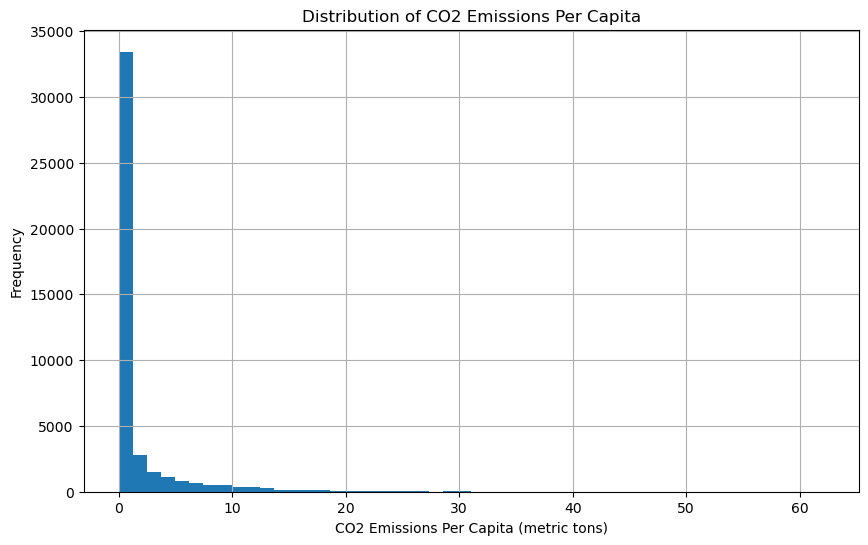

In [112]:
# It is important for me to see the distributions of 'co2_per_capita' in order to understand what type of an influence I can make with my dashboard
# it would also help me understand my owncode well

# I used plotly
plt.figure(figsize=(10, 6))  
df1['co2_per_capita'].hist(bins=50)  

# here I am adding labels and title
plt.xlabel('CO2 Emissions Per Capita (metric tons)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions Per Capita')

# I want to show the gird
plt.grid(True)

print("\nThe below histogram shows the distribution of CO2 per capita:")
# here I am finally displaying the plot
plt.show()


##### Summary of Exploratory Analysis

My exploratory analysis considers the following questions:
- **How many observations are in the dataset?** According to the analysis, there are 43255 observations in this dataset. Observations in this case means the number of rows. Each of these observations include a country paired with a year and the co2 emissions per capita data for that in country in that year. 
- **How many different countries does my cleaned dataset have information about? In order words, how many unique values are in the 'country' categorical value?** There are 194 unique countries in this dataset. That means my future dashboard made using this data will be able to accurately represent CO2 emission datas for 194 countries. 
- **How much missing data is in each column?** According to the analysis conducted below, none of the columns have any missing values. This was something I definitely aimed to ensure in my data cleaning since in order for my dashboard to be sucessful and useful, I can not allow it to have fake data or 'adjusted data' (such as simply replacing all missing values with the median of the column, etc.) about CO2 emissions but I also can not allow data to be missing because missing data would unaccurately change the graphs that will be part of my data visualization. 
- **What is the distribution of co2_per_capita?** It is important for me to see the distribution of the CO2 emissions per capita numerically (regardless of year or country) just so as a data scientist I have an idea of the range the CO2 per capita measurements span and what most of these measurements are! In order to analyze this, in my exploratory analysis, I've made a histogram using plotly which successfuly shows the distribution of the CO2 per capita measurements. In this histogram, I see that an extreme amount of these measurements are between 1 and 10 metric tons. However, there are also countries who have higher emissions than this common range, also shown by the histogram.
- Along with that, my exploratory analysis also used .info() to see basic information about the dataset so I could make better choices of what to analyze about it.

Please run the following code to view my **Data Dictionary**:

In [96]:
import pandas as pd

# First I have to creating a DataFrame
dataDictionary = {
    'Variables': ["country", "year", "co2_per_capita"],
    'Data Type': ['String', 'Integer', 'Float'],
    'Description': ['name of the country', 'the year of the observation of this data', 'the CO2 emissions per capita of the given country in a given year ']
}
dataDictionary = pd.DataFrame(data)

# I am displaying the DataFrame
dataDictionary


,Variables,Data Type,Description
0,country,String,name of the country
1,year,Integer,the year of the observation of this data
2,co2_per_capita,Float,the CO2 emissions per capita of the given coun...


In case you have trouble viewing the above Data Dictionary propery, here is the data dictionary typed out:

| Variables | Data Type | Description |
|----------|----------|----------|
| country | String | name of the country |
| year | Integer | the year of the observation of this data |
| co2_per_capita | Float | the CO2 emissions per capita of the given country in a given year |


#### **List of UI Components + List of Data Visualizations**

**Summary of My Idea:**
My idea for the dashboard is to create an interactive dashboard that helps users see the huge increase in CO2 levels. In the dashboard, there will be different modes such as the following: "worldview" where you see a line graph with all the different countries and their CO2 emissions throughout the years (the years are customizable with a slider) and also a Histogram for the distribution of CO2 emission per capita data (regardless of country or year) on the worldview mode to show the users numerically what the CO2 emissions per capita data tends to be (more frequent measurements vs least frequent measurements) so they can see how frequently high CO2 emissions per capita are recorded; then " single country view" where you see can see a country of your choice's individual CO2 emissions data over the years (the years are customizable with a slider) in a line graph with some written basic information about the country on the right (this is something I would have to manual type in and is not part of my dataset), along with a box and whiskers plot that shows the distribution of the CO2 Emissions per capita data of this country ; then "multiple country view" where users can select multiple countries and view their CO2 emissions per capita over the year (the years are customizable) on a line graph, and on the side the dashboard will display the country with the lowest CO2 emissions in a year and the country with the highest CO2 emissionper capita in a year, and also there will be a Violin plot to compare the distributions of CO2 Emissions per capita data for different countries (the same countries that will be displayed on the line graph in multiple country view); I will also have a "year view" where users can pick a year and see all the country CO2 emissions per capita for that year displayed in a bar graph.



**List of UI components that I could include in the dashboard:** 
- Chained Radio Buttons for selecting the mode of analysis: worldview, multi-country view, single country view, or single year view. Depending on what the user clicks, the other next steps and options fo selections will change.
- Multi-Select Dropdown Menu for selecting countries for whom the user would like see the CO2 emissions per Capita (in Multiple Country View)
- Single-Select Dropdown Menu for selecting country for whom the user would like see the CO2 emissions per Capita (in Single Country View)
- Single-Select Dropdown Menu for selecting year for whom the user would like see the CO2 emissions per Capita in different countries (in Year View)
- Range Slider for selecting the range of years to display data for (In all the different views/modes)
- Using Markdown for the Title
- I can use Markdown text to provide a description of the dashboard and the different modes right below the title of the dashboard.
- Card to be used in single country view and multiple country view (with text of country with lowest emission and also with text of the country with highest emission)

**3-6 possible data visualizations:** 
- Multiple Line Graphs for different visualizations filtered using multi-select dropdowns to select the countries to view (and single select dropdown for single country view) and a range slider to select what years to display data for:
    - worldview- the lines represent all the different countries, x is years, and y is the CO2 emissions per capita
    - single country view- the line represents the chosen country, x is years, and y is the CO2 emissions per capita
    - multiple country view- - the lines represent the different chosen countries, x is years, and y is the CO2 emissions per capita
- Bar graph for year view (representing CO2 emissions per capita of the countries in a given year)- this will be filtered using a single select dropdown for the user to pick a year
- A Histogram for the distribution of CO2 emission per capita data (regardless of country or year, simply just to show users how often high CO2 per capita levels are recorded in this dataset) on the worldview mode
- Box and Whiskers Plot to show the CO2 Emissions per capita data distribution for that country in single country view - this can be filtered using the single select drop down in single country view
- Violin Plot to compare the distributions of CO2 Emissions per capita data for different countries in multiple country view- this can be filtered using the multi-select drop down for multiple country view

*End of assignment.*

Praggnya Kanungo
 
DS 4003